# Working with a 3D data cube (Astrophysics)

requirements: astropy, numpy, matplotlib

contents:
- reading in fits data cubes (3D spectral line data - HI data of a galaxy)
- plotting slices of the 3D data cube
- downloading astronomical images from a database (for the same galaxy as the HI data)
- making an overlay of the HI data onto an optical image
- Plotting the HI spectra of a galaxy
- calculating the HI mass of a galaxy
- making moment maps

## Resources
- Google is your best friend. If you have coding questions, it is likely that someone also had the same question before and there are answers online.
- The documentation of the different python packages, e.g. matplotlib, numpy, astropy is good. You can find a lot of useful information there.
- stackoverflow is a website where people can ask questions of the community. There are generally good solutions there to problems.
- The astropy website has several tutorials and examples that can help you to learn how to do plots and calculations with the package: https://learn.astropy.org/
- There are also several other websites with various free python tutorials

- A collection of lecture notes on Radio astronomy: https://science.nrao.edu/opportunities/courses/era This is a very good resource to learn more about radio astronomy
- usefull information on the spectral lines in general: https://www.cv.nrao.edu/~sransom/web/Ch7.html#E155 This has all the relevant equations

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from reproject import reproject_interp

from astroquery.skyview import SkyView
from astroquery.vizier import Vizier

from spectral_cube import SpectralCube

In [ ]:
! pip install reproject
! pip install astroquery
! pip install spectral_cube

## Read in the data file (fits file)
The data used in this tutorial is the publicly available data from the VIVA (VLA Imaging of Virgo in Atomic gas) Survey: http://www.astro.yale.edu/viva/

In particular, the tutarial is using data for the galaxy NGC 4192 (also known as Messier 98). The data is available from here: http://www.astro.yale.edu/cgi-bin/viva/galaxy.cgi?ngc4192

In [2]:
file = './ngc4192.cube.fits'
hdul = fits.open(file)
h = hdul[0].header
d = hdul[0].data

## Have a look at the content of the file
- print the information in the header
- have a look at the shape (dimensions) of the data
- have a look at the data

In [3]:
print(h.keys)

<bound method Header.keys of SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    4 /                                                
NAXIS1  =                  256 /                                                
NAXIS2  =                  256 /                                                
NAXIS3  =                   62 /                                                
NAXIS4  =                    1 /                                                
EXTEND  =                    T /Tables following main image                     
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'N4192   '           /Source name                                     
TELESCOP= 'VLA     '           /                                                
INSTRUME= 'VLA     '           /                                                

In [4]:
print(d.shape)
print(d)

(1, 62, 256, 256)
[[[[-3.6281166e-03 -2.6981130e-03 -5.8354961e-04 ... -9.1724930e-04
     6.6034804e-04 -1.1509309e-03]
   [ 2.0652029e-03  1.1588887e-03  9.0807001e-04 ... -1.7462452e-03
    -1.3323380e-04  1.8807031e-03]
   [ 2.6934536e-03  1.7948657e-03  8.9088903e-04 ...  5.3501601e-04
     7.6454296e-04  1.8101333e-03]
   ...
   [ 1.9165993e-05  5.4351299e-06  7.0625893e-04 ... -1.2413959e-03
    -9.1707613e-04 -3.0264149e-05]
   [-1.0344071e-03 -5.5619137e-04 -2.7843827e-04 ...  9.5449737e-04
    -9.9116424e-04 -1.2783873e-03]
   [-3.5533754e-03 -2.7347053e-03 -1.4301277e-03 ...  1.0818606e-03
     4.2374613e-05 -2.0641759e-03]]

  [[ 9.9507021e-04  2.1732839e-04  6.8709080e-04 ...  1.8272563e-03
     1.2921795e-03  1.1106437e-03]
   [ 6.7590730e-04 -7.5019803e-04 -6.6079007e-04 ...  1.8953325e-04
     4.2826092e-04  8.2366832e-04]
   [ 1.1340961e-03  1.0402830e-03  2.0158726e-04 ...  1.0093969e-03
     1.1487325e-03  6.5237784e-04]
   ...
   [ 1.0511193e-03  1.2503690e-03  1.41

## Plot slices of the cube

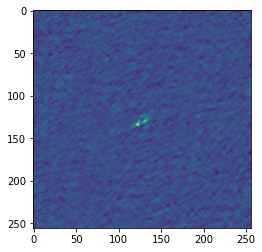

In [5]:
plt.imshow(d[0,30,:,:])

In [6]:
d_2 = d[0,:,:,:]
print(d_2.shape)

(62, 256, 256)


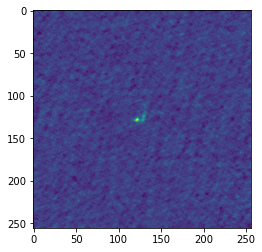

In [7]:
plt.imshow(d_2[25,:,:])

### Plot several slices of the data in one figure
- use subplots in matplotlib

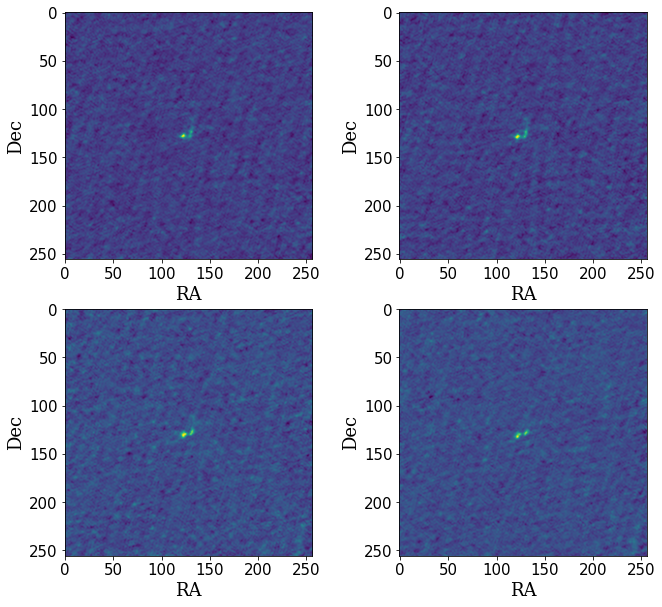

In [8]:
fig = plt.figure(figsize=(11,10))

for j,i in enumerate(range(25,29), start=1):
    ax = fig.add_subplot(2,2,j)
    plt.imshow(d_2[i,:,:])
    ax.set_xlabel('RA', size=18,family='serif')
    ax.set_ylabel('Dec', size=18,family='serif')
    #plt.xlim([0,9])
    #plt.ylim([0,9])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.savefig('ngc4192_test.png')

In [9]:
### Plot one spatial axis and the frequency axis

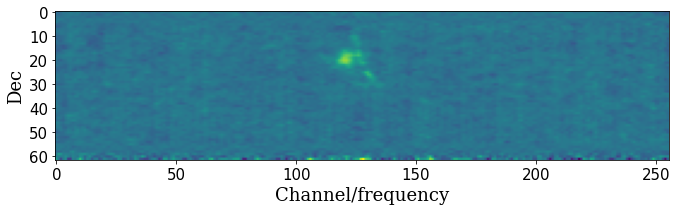

In [10]:
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2[:,125,:])
ax.set_xlabel('Channel/frequency', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('ngc4192_test_2.png')

## Average some channels

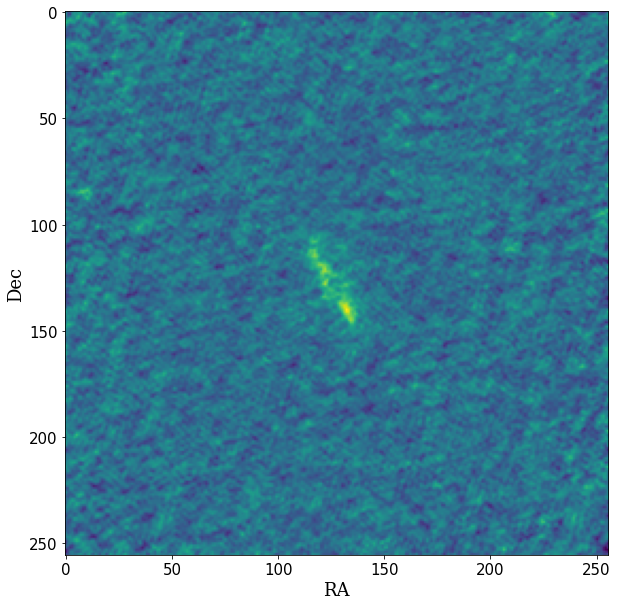

In [11]:
fig = plt.figure(figsize=(11,10))

d_2_av = np.mean(d_2, axis=0)

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_av)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('ngc4192_test_3.png')

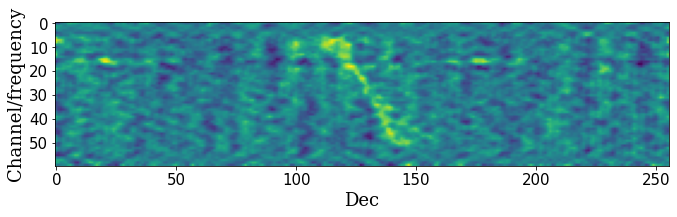

In [12]:
fig = plt.figure(figsize=(11,10))

d_2_av = np.mean(d_2, axis=2) # axis 2 is the RA

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_av[:-2,:])
ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/frequency', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('ngc4192_pv.png')

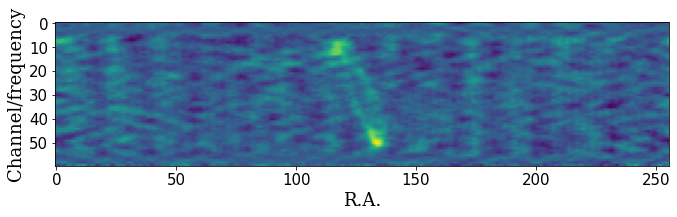

In [13]:
fig = plt.figure(figsize=(11,10))

d_2_av = np.mean(d_2, axis=1) # axis 1 is the declination

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_av[:-2,:])
ax.set_xlabel('R.A.', size=18,family='serif')
ax.set_ylabel('Channel/frequency', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('ngc4192_pv_2.png')

## Mask the cube
Mask the noisy pixels, i.e. pixles with signal to noise less than 3

### Calculate the rms of the data 
Thsi can be used for a treshold. For example 5 sigma is usually a good lower treshold for detection

In [14]:
def calc_rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms

rms = calc_rms(d_2)
print(rms)

0.0013798041


In [15]:
d_2[d_2 < 5*rms] = 0
print(d_2.shape)

(62, 256, 256)


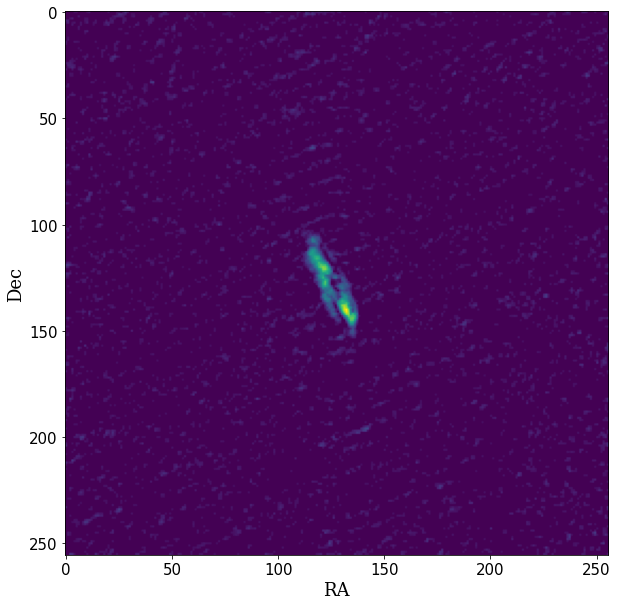

In [16]:
fig = plt.figure(figsize=(11,10))

d_2_mom0 = np.sum(d_2, axis=0)* abs(h['CDELT3'])/1000  # this is the 0 orderd moment of the data also called moment 0

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_mom0)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('ngc4192_test_3sig.png')


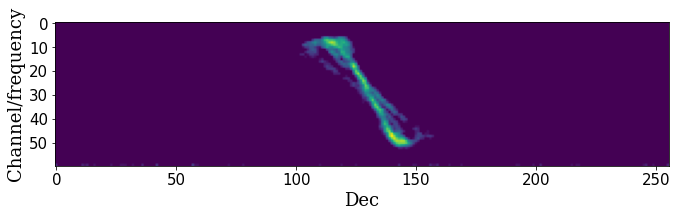

In [17]:
fig = plt.figure(figsize=(11,10))

d_2_av = np.mean(d_2, axis=2)

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_av[:-2,:])
ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/frequency', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('ngc4192_pv_3sig.png')

## Save the mom 0 map of the data into a fits file

In [18]:
wcs_new = WCS(naxis=2)
wcs_new.wcs.cdelt = [h['CDELT1'], h['CDELT2']]
wcs_new.wcs.ctype = [h['CTYPE1'], h['CTYPE2']]
wcs_new.wcs.crval = [h['CRVAL1'], h['CRVAL2']]
wcs_new.wcs.crpix = [h['CRPIX1'], h['CRPIX2']]
header = wcs_new.to_header()

hdul_new = fits.PrimaryHDU(d_2_mom0, header=header)
hdul_new.writeto('mom0.fits', overwrite=True)


## Check the saved mom 0 map

In [19]:
file = './mom0.fits'
hdul_mom0 = fits.open(file)
h_mom0 = hdul_mom0[0].header
d_mom0 = hdul_mom0[0].data

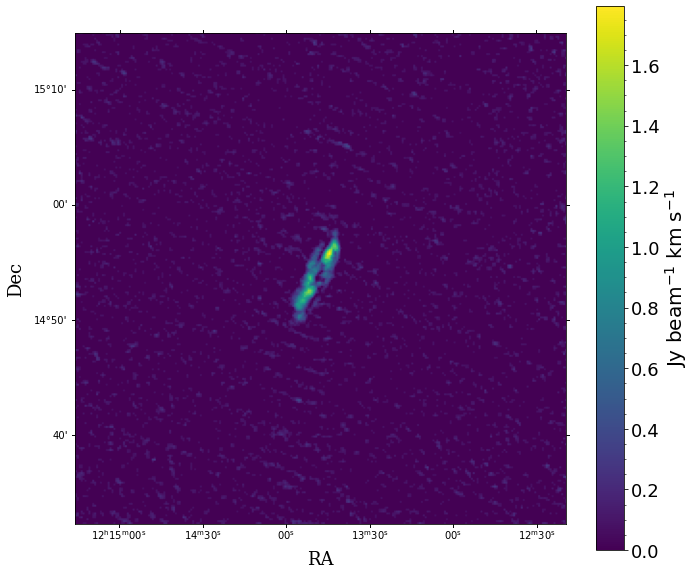

In [20]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_mom0))  # by using the projection argument and the WCS package you can have the x and y axis in sky coordinates 
cb = plt.imshow(d_mom0)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)

fig.savefig('./ngc4192_mom0.png', dpi=200)


## Make an overlay on an optical image
### get the central coordinate of the image

In [21]:
c = SkyCoord(h_mom0['CRVAL1'], h_mom0['CRVAL2'], unit="deg")
print(c.to_string('hmsdms'))

12h13m48.1806s +14d53m42.4612s


### retrieve optical image from an online archive
We are going to use skyview here

You can check the name of the available survey data here: https://astroquery.readthedocs.io/en/latest/skyview/skyview.html  (this is a list of names that can go into the survey argument)

And you can also use the skyview website directly to check if the particular survey has data for that galaxy: https://skyview.gsfc.nasa.gov/current/cgi/query.pl just type in the name or the coordinates of the galaxy and select the surveys you are interested in.

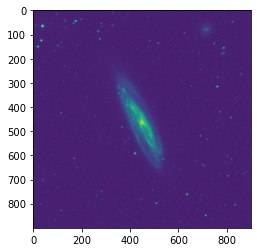

In [22]:
path = SkyView.get_images(position=c.to_string('hmsdms'), width=0.3*u.deg, height=0.3*u.deg, survey=['DSS2 Blue'], pixels=[900,900])

hdulist_opt = path[0]
d_opt = hdulist_opt[0].data
h_opt = hdulist_opt[0].header

plt.imshow(d_opt)
        

### Reproject the HI image onto the same pixel grid as the optical image

In [23]:
print(d_opt.shape)
print(d_mom0.shape)

(900, 900)
(256, 256)


In [24]:
hi_reprojected, footprint = reproject_interp(hdul_mom0, h_opt)

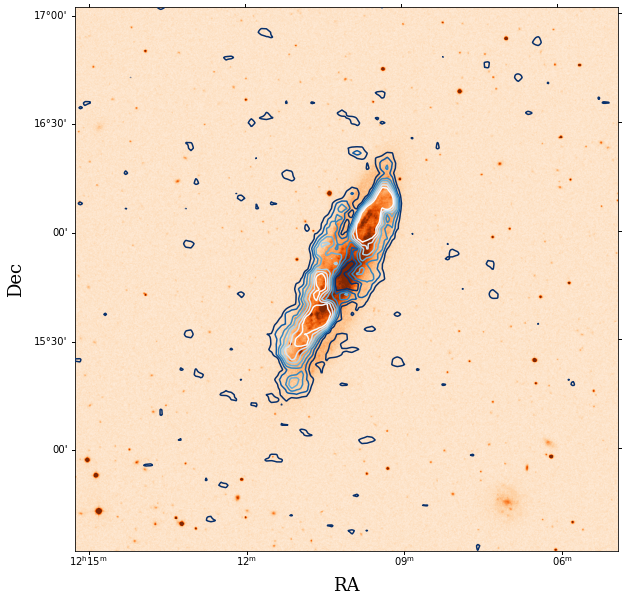

In [25]:
rms_mom0 = calc_rms(hi_reprojected)


fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_mom0))
ax.imshow(d_opt, cmap='Oranges', vmax=np.percentile(d_opt, 99.8))
ax.contour(hi_reprojected, levels=np.arange(1,8)*rms_mom0, cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig('./ngc4192_mom0_overlay.png', dpi=200)


## Plot the HI spectrum of the galaxy
- plot the spectrum of one spaxel in the data
- average the spectrum in a number of pixels
- average the spectrum based on a criteria (e.g. above 5 sigma detection)

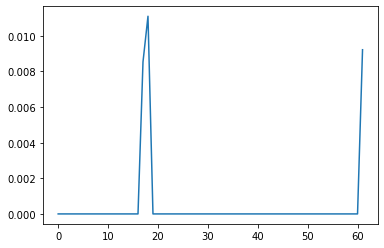

In [26]:
plt.plot(d_2[:,125,125])

(62, 256)


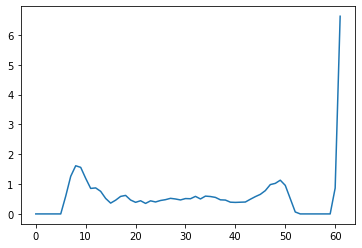

In [27]:
# average some spaxels
d_av = np.sum(d_2[:,90:160,:], axis = 1)
print(d_av.shape)
d_av_2 = np.sum(d_av[:,90:150], axis = 1)
plt.plot(d_av_2)

### Average the spectra above 5 sigma detection
Note the tipical "dubble horn" shape of the profile, this is showing the rotation of the galaxy

(62, 256)
3rd axis type FELO-HEL
3rd axis steps -10304.70703
3rd axis type -160000.0
data units JY/BEAM


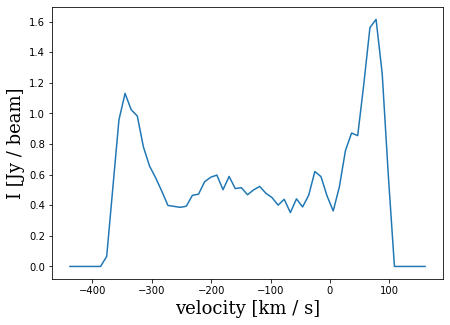

In [28]:
#d_2[d_2 < 5*rms] = 0
#print(d_2.shape)
#print(h.keys)

d_av = np.sum(d_2[:,:,:], axis = 1)
print(d_av.shape)
d_av_2 = np.sum(d_av[:,:], axis = 1)
spectra = d_av_2  

print('3rd axis type', h['CTYPE3'])  # the third dimension of this cube is in heliocentric velocity
print('3rd axis steps', h['CDELT3']) # in m/s
print('3rd axis type', h['CRVAL3']) # in m/s
print('data units', h['BUNIT']) # in m/s

x_axis = (np.arange(0,len(spectra))*h['CDELT3']-h['CRVAL3']) / 1000 # we also convert to km/s from m/s

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
plt.plot(x_axis[:-3], spectra[:-3])  # the last channel if the data cube is bad (with very high noise), so we don't include that in the plot
ax.set_xlabel('velocity [km / s]', size=18,family='serif')
ax.set_ylabel('I [Jy / beam]', size=18,family='serif')
plt.savefig('ngc4192_HI_spectra.png')


## Calculate the HI mass of the galaxy
A good information source on galaxies is the NASA/IPAC Extragalactic Data Base (NED): https://ned.ipac.caltech.edu/

If you search the galaxy NGC 4192, you will find various informatio on it, including: coordinates, optical magnitudes, optical diameter, distance measurments, optical velocity measurment, other names, morpthological identification etc. 

This is an extragalactic data base, so you can also search other catalogued galaxies in this data base.

In [29]:
spectra_2 = spectra[spectra > 0] 
vel_ext = (abs(h['CDELT3'])/1000) * len(spectra_2) # calculate the velocity extent of the spectra
chan_width = abs(h['CDELT3'])/1000

beam_px = (np.pi * (18.26/3600/h['CDELT2']) * (16.03/3600/h['CDELT2'])) / (4 * np.log(2))  # beam size in pixels

S_int = np.sum(spectra[:-3] * chan_width / beam_px)  # integrate the spectra in km/s, final unit needs to be in Jy
print(S_int)


92.27826


### Calculate the distance to the galaxy

In [30]:
H_0 = 70 # Hubble constant

v_opt = -142.1 # systemic velocity of the galaxy in the optical velocity frame (the middle of the integrated line profile)
# note that this galaxy has a negative optical velocity. This means that it is moving tovards the Milky Way and not away from it. 
#Only very nearby galaxies have negative velocities

distance_hf = abs(v_opt) / H_0   # This is the way to calculate the hubble flow distance to galaxies
distance = 16 # in MPc - in the case of this galaxy the hubble flow distances are not accurate because the galaxy has a relatively large peculiar motion compared to its systematic velocity
# for this tutorial we will use 16 MPc for the distance of all Virgo cluster galaxies

print('Comapring hubble flow distance to Virgo cluster distance:', distance_hf, distance)


Comapring hubble flow distance to Virgo cluster distance: 2.03 16


### The HI mass of the galaxy

In [31]:
#S_int = 70.50
m_HI = 2.36 * 10**5 * S_int * distance**2
print(r'HI mass in units of 10$^{8} M_{sun}$:', m_HI/10**8)


HI mass in units of 10$^{8} M_{sun}$: 55.750833125


## Calculate the moment 2

In [32]:
cube = SpectralCube.read('./ngc4192.cube.fits')
cube_2 = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1.420405752 * u.GHz) 


### Have a quick look at the data
SpectralCube has the finctinolaty to make very quick plots of the data

INFO: Auto-setting vmin to -4.164e-03 [aplpy.core]
INFO: Auto-setting vmax to  4.310e-03 [aplpy.core]


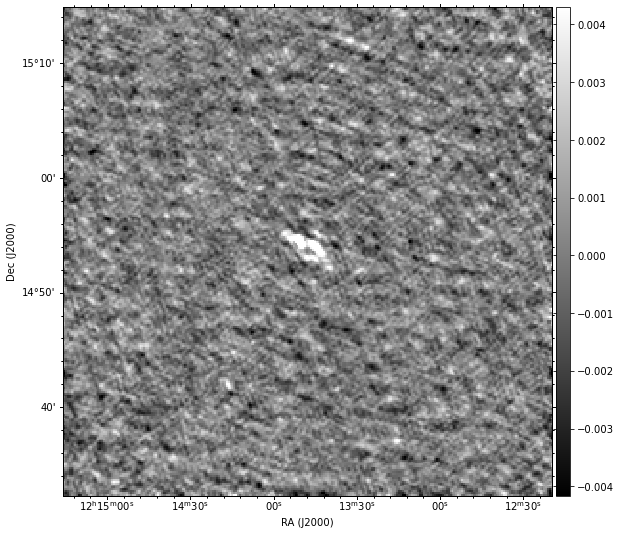

In [33]:
cube_2[30,:,:].quicklook()

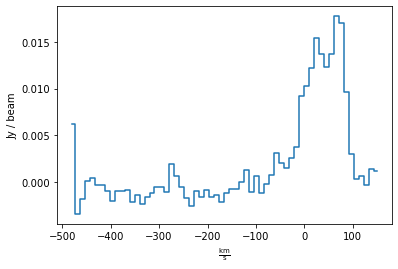

In [34]:
cube_2[:,120,120].quicklook()

In [35]:
subcube = cube_2.spectral_slab(-490*u.km/u.s,100*u.km/u.s)
mom0 = subcube.moment(order=0)  # this creates a similar object to that what is in a fits file. There is a header and a data part
print(mom0.shape)
print(mom0.header)



(256, 256)
SIMPLE  =                    T /                                                BITPIX  =                  -32 /                                                NAXIS   =                    2                                                  NAXIS1  =                  256                                                  NAXIS2  =                  256                                                  EXTEND  =                    T /Tables following main image                     BLOCKED =                    T /Tape may be blocked                             OBJECT  = 'N4192   '           /Source name                                     TELESCOP= 'VLA     '           /                                                INSTRUME= 'VLA     '           /                                                OBSERVER= 'AK73    '           /                                                DATE-MAP= '2007-01-13'         /Last processing date YYYY-MM-DD                 BSCALE  =    1.00000000000E+0

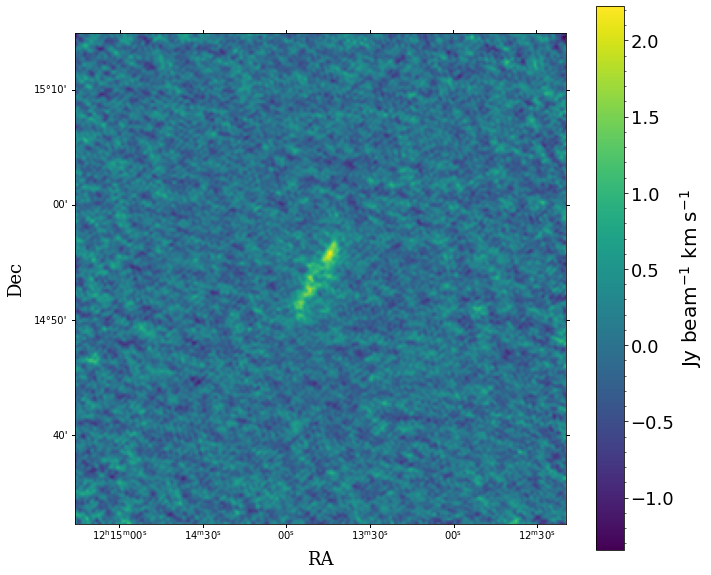

In [36]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=(WCS(mom0.header)))
cb = plt.imshow(mom0.data)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)
fig.savefig('./ngc4192_mom0_v2.png', dpi=200)

### Write moment map into a fits file

In [37]:
mom0.write('./mom0_v2.fits', overwrite=True) 

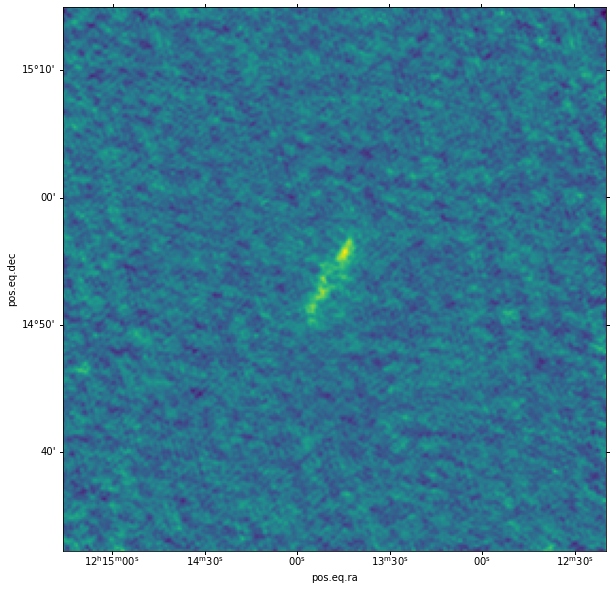

In [38]:
file = './mom0_v2.fits'
hdul_mom0 = fits.open(file)
h_mom0 = hdul_mom0[0].header
d_mom0 = hdul_mom0[0].data

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=(WCS(hdul_mom0[0].header)))
plt.imshow(d_mom0)

### Make a moment 1 map

In [39]:
mom1 = subcube.moment(order=1)

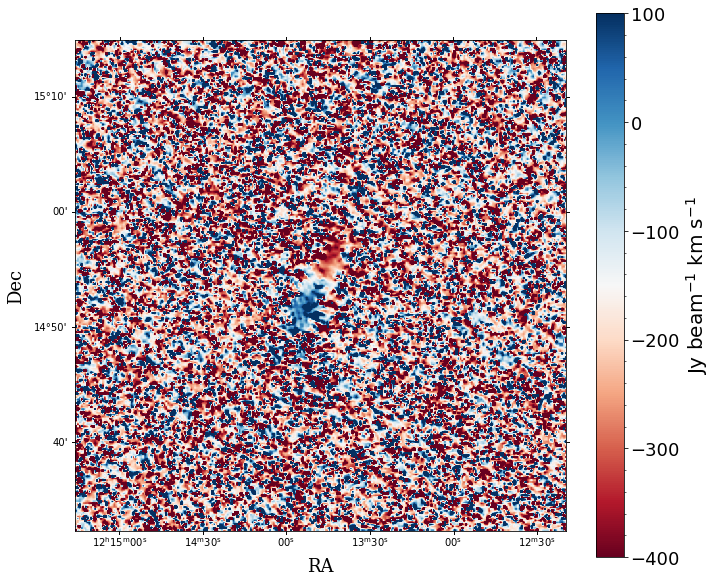

In [40]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=(WCS(mom0.header)))
cb = plt.imshow(mom1.data, cmap='RdBu', vmin=-400, vmax=100)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)
fig.savefig('./ngc4192_mom1.png', dpi=200)

This image looks very noisy because pixels that don't have HI emission from the galaxy are also included. To make this plot look nicer we can create a mask or filter for the data, so that we only plot pixels that have significant HI emission based on the moment 0 map. 

### Create a mask based on the moment 0 map

In [41]:
mom0_mask = np.array(mom0.data) 
mom0_mask[mom0_mask < 0.5] = 'nan'  # set the noise to nan
mom0_mask[mom0_mask > 0.5] = 1   # set the pixels with emission to 1, we will multiply with this mask array

### Plot the masked moment 1 map

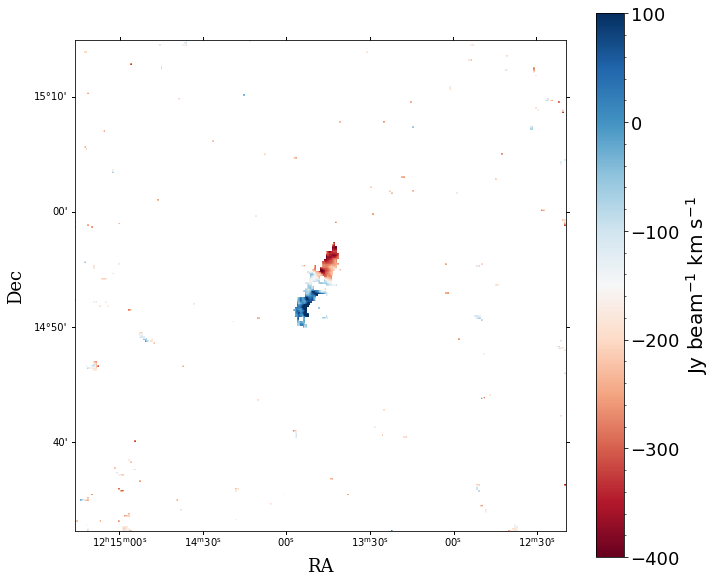

In [42]:
mom1_clean = np.array(mom1.data)* mom0_mask

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=(WCS(mom0.header)))
cb = plt.imshow(mom1_clean, cmap='RdBu', vmin=-400, vmax=100)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)

fig.savefig('./ngc4192_mom1_v2.png', dpi=200)

# Homework

1) Calculate the mass of NGC 4321

The data is available here: http://www.astro.yale.edu/cgi-bin/viva/galaxy.cgi?ngc4321 (Download the "Cleaned cube")

Note the different "beam size" compared to NGC 4192

Use the same distance in Mpc as for NGC 4192

2) Make a moment 0 and a moment 1 map of NGC 4321

3) Make an overlay on an optical image and a UV image (you can use the GALEX near UV data from SkyView)

4) Make a plot of the spectrum of NGC 4321